# Programa Ingenias+ Data Science

Recordemos que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En las clases anteriores, vimos como realizar el analisis exploratorio de los datos, observar el tipo de datos que teniamos, hacernos preguntas y ver algunos patrones. Luego, procesamos y transformamos nuestros datos para luego ajustar modelos de regresión y clasificación.

Llego la hora de utilizar de ver los conceptos de aprendizaje no supervisado para encontrar patrones o grupos de datos.

Utilizaremos nuevamente `scikit-learn` que podes consultar su documentación [aquí](https://scikit-learn.org/stable/).

<font size=5> 🚀 👩🏽‍💻 Machine Learning: Aprendizaje No Supervisado 📣 </font>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a trabajar **primero** con el método K-means.

Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en scikit-learn. Notemos que estos datos vienen con un label asociado donde nos indica a que cluster pertenecen.

Vamos a trabajar con datos sinteticos para poder focalizarnos en como funciona el algortimo, en lugar de entender las caracteristicas asociadas a los datos. En un proyecto real, deberiamos explorar los datos y realizar el analisis exploratorio y transformacion de variables que ya realizamos.

¿Por qué es importante hacer una exploración de las variables y obtener estadistica descriptiva?

Para poder aplicar K-means, por ejemplo, deben cumplir ciertos requerimientos:
  
K-means asume que:

- **Forma de los clusters**: La varianza de la distribución es esferica. Lo que significa que los clusters tienen una forma esferica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.
- **Tamaño de los clusters**: Todos los clusters deben tener el mismo numero (o muy similar) de observaciones
- **Relación entre las variables**: Existe poca o ninguna correlación entre las variables.

In [ ]:
from sklearn.datasets import make_blobs, make_moons

#### Primer Dataset

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)

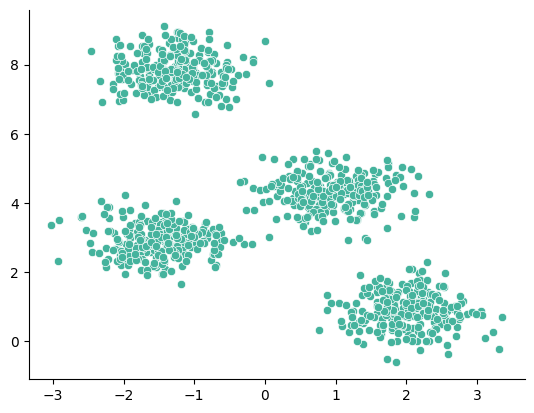

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], color='#45B39D')
sns.despine()
plt.show()

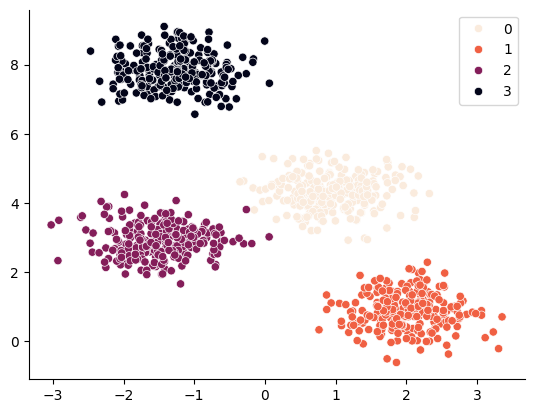

In [ ]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1, palette='rocket_r')
sns.despine()
plt.show()

#### Segundo Dataset

In [ ]:
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)

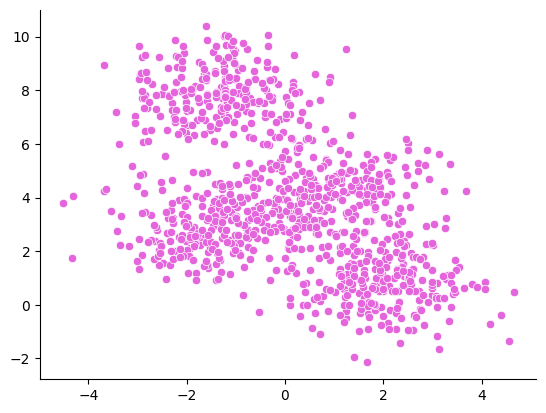

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], color='#E565DD')
sns.despine()
plt.show()

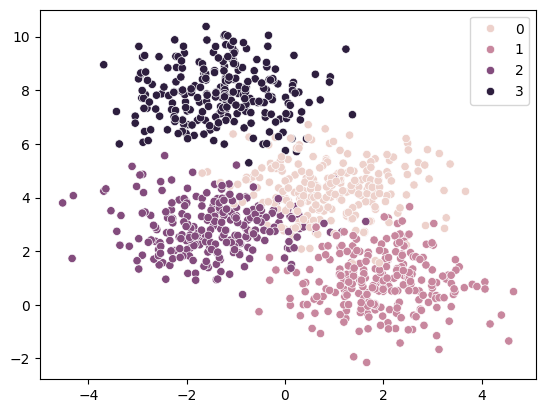

In [ ]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

#### Tercer Dataset

In [ ]:
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

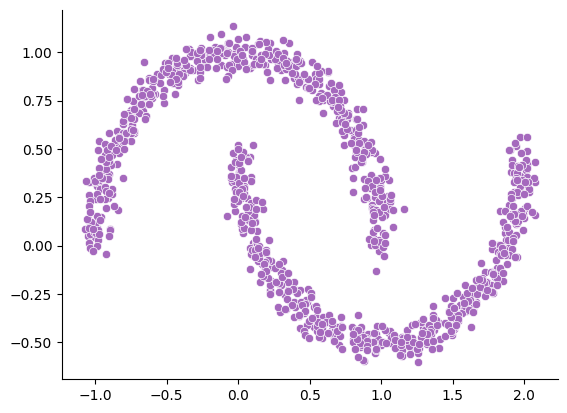

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], color='#A569BD')
sns.despine()
plt.show()

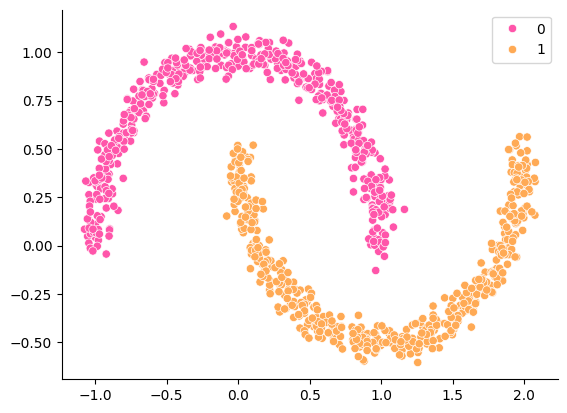

In [ ]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3, palette='spring')
sns.despine()
plt.show()

# K-MEANS

La idea ahora es utilizar el metodo de k-means para poder identificar los clusters sin conocer esta etiqueta.

Como es predecible, scikit-learn tiene una implementación para [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [ ]:
# Importemos la libreria
from sklearn.cluster import KMeans

In [ ]:
# Especificamos el numero adecuado de clusters en cada caso
first_kmeans = KMeans(n_clusters=4, random_state=0)
sec_kmeans = KMeans(n_clusters=4, random_state=0)
thr_kmeans = KMeans(n_clusters=2, random_state=0)

Entrenamos los modelos con los datos sin pasarles las etiquetas.

In [ ]:
first_kmeans.fit(X1);
sec_kmeans.fit(X2)
thr_kmeans.fit(X3);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Luego de entrenar los modelos, podemos consultar el lugar de los centroides y la cantidad de puntos asignados a cada cluster.

In [ ]:
first_centroids = first_kmeans.cluster_centers_
print(first_centroids)

[[-1.49807428  2.90164881]
 [-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [ 0.92917513  4.29023124]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-16-bbcfe70224c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_means, palette='vlag')


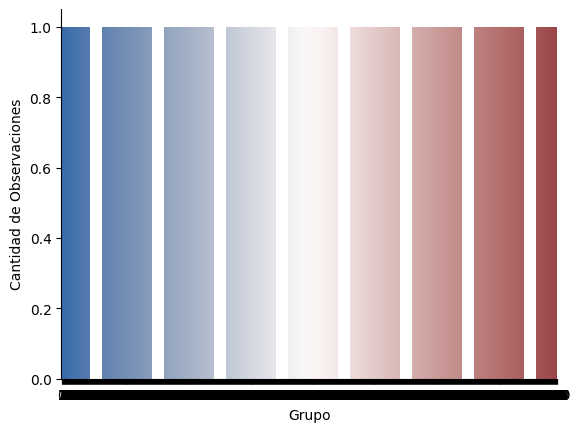

In [ ]:
y_means = first_kmeans.fit_predict(X1)
sns.countplot(y_means, palette='vlag')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
sns.despine()

In [ ]:
second_centroids = sec_kmeans.cluster_centers_
print(second_centroids)

[[-1.31360134  7.86561393]
 [ 0.97790397  4.28661633]
 [-1.51473374  2.8755229 ]
 [ 1.99871335  0.79038817]]


-----
#ESTA CLASE COMIENZA AQUI

# DBSCAN

Ya vimos que Kmeans no tiene un buen desempeño cuando los cluesters no tienen forma de esfera. Veamos ahora como se comporta metodo de DBSCAN para poder identificar los clusters.

Scikit-learn tiene una implementación para [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).


Inicializemos ahora tres modelos, uno para cada dataset y ajustemoslos.

DBSCAN es un algoritmo de agrupamiento muy popular que se basa en la densidad. La idea es que si un determinado punto pertenece a un grupo, debe estar cerca de muchos otros puntos del mismo grupo. Esos puntos deben estar cerca entre sí. Por lo tanto, el algoritmo define un grupo como una región de alta densidad. También funciona bien si los grupos son de forma arbitraria. El algoritmo es bastante simple y tiene solo dos parámetros: el radio de la vecindad (eps) y el número mínimo de puntos para formar un grupo (minPts).

In [ ]:
from sklearn.cluster import DBSCAN

# Clusters estimados: 2
# Puntos ruidosos: 0


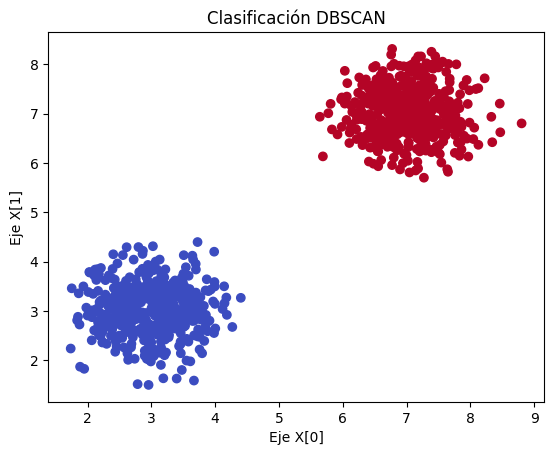

In [ ]:
# Ejemplo simple

# Configuración de datos y parámetros
num_samples_total = 1000  # Número total de muestras a generar
cluster_centers = [(3, 3), (7, 7)]  # Centros de los clusters
num_classes = len(cluster_centers)  # Número de características (dimensiones)
epsilon = 1.0  # Radio de la vecindad en DBSCAN
min_samples = 13  # Número mínimo de muestras en una vecindad para formar un cluster


# Generacion de datos
# X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# X: coordenadas de los puntos generados, y: etiquetas de los clusters
X, y = make_blobs(
    n_samples=num_samples_total,          # Número total de muestras
    centers=cluster_centers,              # Coordenadas de los centros de los clusters
    n_features=num_classes,               # Número de características (dimensiones)
    center_box=(0, 1),                    # Rango para la generación de los centros
    cluster_std=0.5                       # Desviación estándar de los clusters
)


# Aplicación del algoritmo DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)  # Ajuste del modelo DBSCAN
labels = db.labels_  # Etiquetas asignadas a cada punto
no_clusters = len(np.unique(labels))  # Número de clusters encontrados (excluyendo ruido)
no_noise = np.sum(np.array(labels) == -1)  # Número de puntos clasificados como ruido (outliers)
print('# Clusters estimados: %d' % no_clusters)  # Muestra el número de clusters estimado
print('# Puntos ruidosos: %d' % no_noise)  # Muestra el número de ruido

# Generar figuras de datos
# Asignar un color a cada punto basado en su etiqueta de cluster - ESTO NO ES NECESARIO PERO NOTEN COMO PODEMOS INCLUSO COLOCAR ESTOS VALORES
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))

# Crear el gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=colors, marker="o", picker=True)
plt.title('Clasificación DBSCAN')  # Título del gráfico
plt.xlabel('Eje X[0]')  # Etiqueta del eje X
plt.ylabel('Eje X[1]')  # Etiqueta del eje Y
plt.show()  # Muestra el gráfico



---



---



In [ ]:
# si no se ha ejecutado previamente:
# import numpy as np
# from sklearn.datasets import make_blobs

In [ ]:
# Especificamos los valores de los hiperparámetros de los tres modelos.

db_1 = DBSCAN(eps=0.5, min_samples=10) # eps: radio de la vecindad, min_samples: número mínimo de puntos para formar un cluster
db_2 = DBSCAN(eps=0.3, min_samples=10)
db_3 = DBSCAN(eps=0.2, min_samples=8)

In [ ]:
# Realizamos el entrenamiento de los modelos instanciados

db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=8)

Las etiquetas quedan asignadas en la variable labels_. Cuando el label = -1 quiere decir que esa instancia fue considerada ruido.

Podemos consultar tanto el número de clusters como el número de instancias consideradas ruido.

In [ ]:
# Consultamos las etiquetas del primer modelo
labels_1 = db_1.labels_ # Etiquetas de cada punto de datos (componente conectada) en el rango [0, n_clusters-1] o -1 si el punto de datos no está en ningún grupo.

# Número de clusters en las etiquetas, ignorando el ruido en caso que esté presente.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0) # set(labels_1): conjunto de etiquetas únicas, len(set(labels_1)): número de etiquetas únicas, -1 in labels_1: True si -1 está en labels_1, False si no está
n_noise_1 = list(labels_1).count(-1) # list(labels_1): lista de etiquetas, list(labels_1).count(-1): número de veces que aparece -1 en la lista de etiquetas

In [ ]:
# Consultamos para el primer modelo

print('Número estimado de clusters: %d' % n_clusters_1) # n_clusters_1: número de clusters
print('Número estimado de puntos de ruido: %d' % n_noise_1) # n_noise_1: número de puntos de ruido

Número estimado de clusters: 4
Número estimado de puntos de ruido: 10


Definimos una función para graficar los resultados, de manera tal que coloree los distintos clusters y coloque en gris los datos que se consideran ruido. Además, fijamos en tamaño más grande las instancias que son CORES.

In [ ]:
'''
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Numero estimado de clusters: %d' % n_clusters_1)
    plt.show()
'''

"\ndef plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):\n    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)\n    core_samples_mask_1[db_1.core_sample_indices_] = True\n    unique_labels = set(labels_1)\n    colors = [plt.cm.Spectral(each)\n              for each in np.linspace(0, 1, len(unique_labels))]\n    for k, col in zip(unique_labels, colors):\n        if k == -1:\n            col = [0, 0, 0, 1]\n\n        class_member_mask = (labels_1 == k)\n\n        xy = X1[class_member_mask & core_samples_mask_1]\n        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),\n                 markeredgecolor='k', markersize=14)\n\n        xy = X1[class_member_mask & ~core_samples_mask_1]\n        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),\n                 markeredgecolor='k', markersize=6)\n    plt.title('Numero estimado de clusters: %d' % n_clusters_1)\n    plt.show()\n"

In [ ]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Creamos una máscara
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    # esta función devuelve un array de ceros con la misma forma y tipo que el array de entrada (db_1.labels_)
    core_samples_mask_1[db_1.core_sample_indices_] = True # los elementos de core_sample_indices_ se ponen a True
    # Plot result


    unique_labels = set(labels_1) # crea un conjunto con los elementos de labels_1 (elimina los duplicados) y lo asigna a unique_labels (etiquetas únicas)
    colors = [plt.cm.Spectral(each) # crea una lista de colores (cada color es una lista de 4 elementos) con la paleta Spectral (cmap)
              for each in np.linspace(0, 1, len(unique_labels))] # np.linspace devuelve números espaciados uniformemente sobre un intervalo especificado (0,1) y len(unique_labels) es el número de elementos que devuelve linspace (número de etiquetas únicas)
    for k, col in zip(unique_labels, colors): # zip crea una lista de tuplas, cada tupla contiene un elemento de unique_labels y un elemento de colors (cada color es una lista de 4 elementos)
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k) # crea una máscara con los elementos de labels_1 que son iguales a k (etiquetas únicas) y lo asigna a class_member_mask (máscara de miembros de clase)

        xy = X1[class_member_mask & core_samples_mask_1] # crea un array con los elementos de X1 que cumplen las dos condiciones (class_member_mask y core_samples_mask_1) y lo asigna a xy
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14) # pinta los puntos de xy (coordenada x y coordenada y) con el color de la paleta Spectral (col) y con un tamaño de 14 (markersize)

        xy = X1[class_member_mask & ~core_samples_mask_1] # crea un array con los elementos de X1 que cumplen la primera condición (class_member_mask) y no cumplen la segunda (core_samples_mask_1) y lo asigna a xy
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6) # pinta los puntos de xy (coordenada x y coordenada y) con el color de la paleta Spectral (col) y con un tamaño de 6 (markersize)
    plt.title('Número estimado de clusters: %d' % n_clusters_1, fontsize = 15) # pone un título al gráfico con el número de clusters estimado (n_clusters_1)
    plt.show()
    return

Veamos como le fue a DBSCAN con el primer dataset:

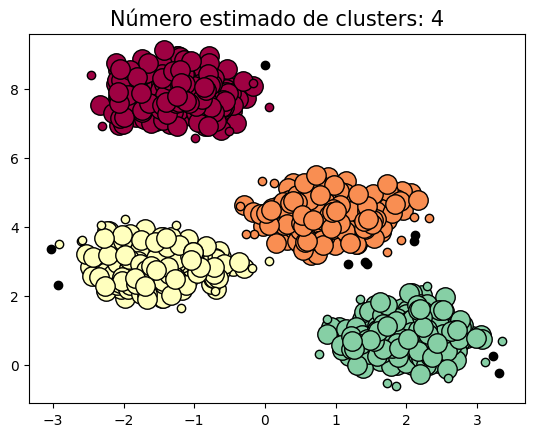

In [ ]:
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

Veamos ahora el segundo caso:

Estimated number of clusters: 5
Estimated number of noise points: 537


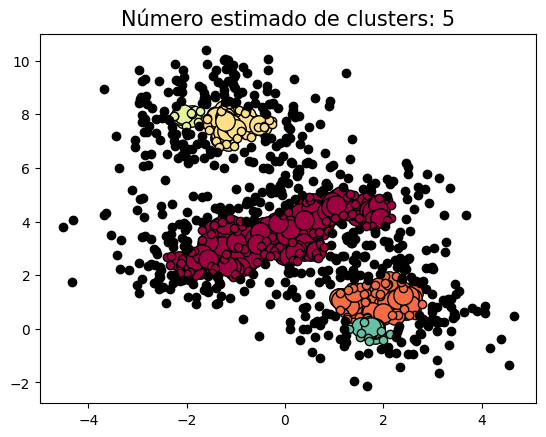

In [ ]:
# Consultamos las etiquetas
labels_2 = db_2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0) # -1 es el ruido (outliers), el ruido son los puntos que no pertenecen a ningun cluster (no son CORES) y por lo tanto no tienen etiqueta.
n_noise_2 = list(labels_2).count(-1)

print('Estimated number of clusters: %d' % n_clusters_2)
print('Estimated number of noise points: %d' % n_noise_2)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_2 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_2[db_2.core_sample_indices_] = True

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

Estimated number of clusters: 2
Estimated number of noise points: 0


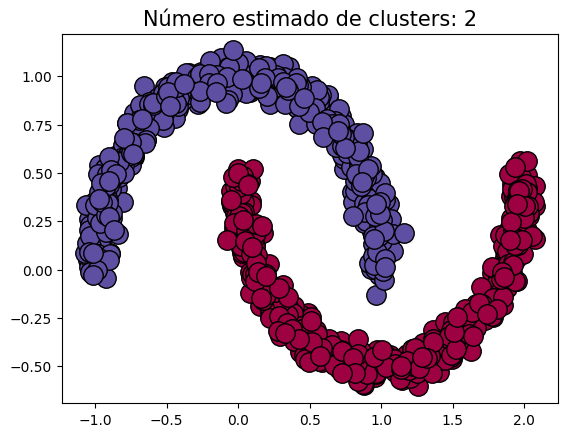

In [ ]:
# Consultamos las etiquetas
labels_3 = db_3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

print('Estimated number of clusters: %d' % n_clusters_3)
print('Estimated number of noise points: %d' % n_noise_3)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_3 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_3[db_2.core_sample_indices_] = True

plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)

Como dijimos en la parte teorica, DBSCAN es muy efectivo cuando los clusters no tienen forma de esfera. Es el caso del dataset 3, Kmeans tenia una performance muy baja, sin embargo DBSCAN puede hacer clusters que tienen mas sentido.

# Resumen

In [ ]:
# Generamos algunos datos de ejemplo - notemos la diferencia entre arrays X1, X2 y X3 - notemos tambien que se omiten las etiquetas
X1, _ = make_blobs(n_samples=300, centers=[[1, 1], [-1, -1], [1, -1]], cluster_std=0.4, random_state=0)
X2, _ = make_blobs(n_samples=300, centers=[[2, 2], [3, 3], [4, 4]], cluster_std=0.4, random_state=0)
X3, _ = make_blobs(n_samples=300, centers=[[1, 2], [2, 1], [2, 2]], cluster_std=0.4, random_state=0)

# Especificamos los valores de los hiperparámetros de los tres modelos.
db_1 = DBSCAN(eps=0.5, min_samples=10)
db_2 = DBSCAN(eps=0.3, min_samples=10)
db_3 = DBSCAN(eps=0.2, min_samples=8)

# Realizamos el entrenamiento de los modelos instanciados
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=8)

Modelo 1
Número estimado de clusters: 1
Número estimado de puntos de ruido: 1


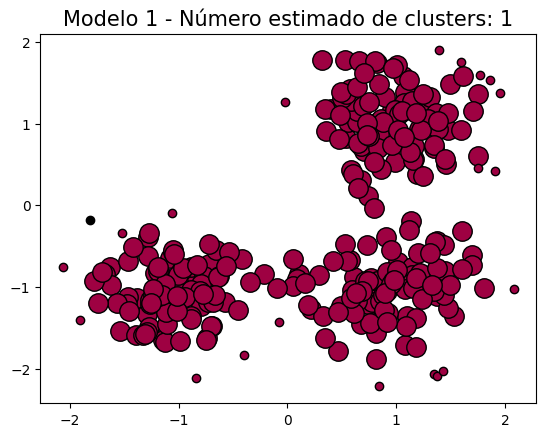

Modelo 2
Número estimado de clusters: 1
Número estimado de puntos de ruido: 37


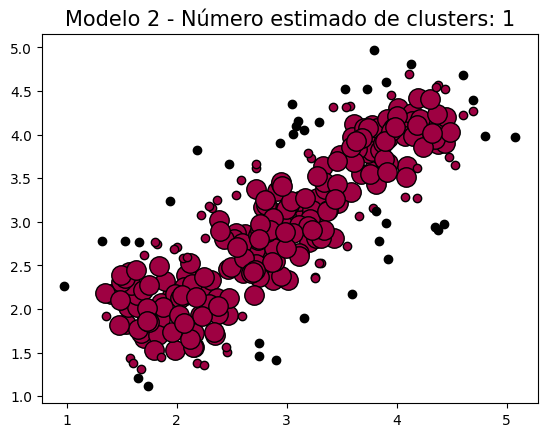

Modelo 3
Número estimado de clusters: 2
Número estimado de puntos de ruido: 66


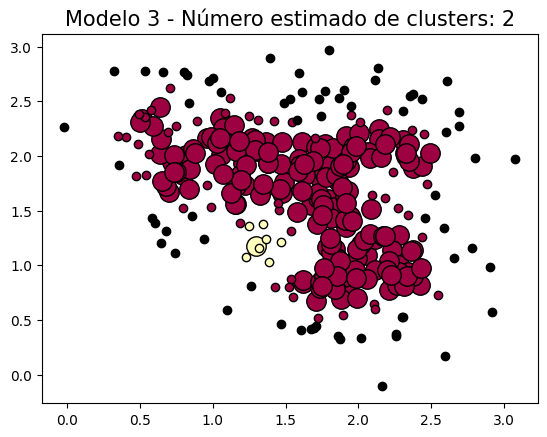

In [ ]:
# Función para consultar y visualizar los resultados
def consultar_y_visualizar(db, X, modelo_num):
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f'Modelo {modelo_num}')
    print(f'Número estimado de clusters: {n_clusters}')
    print(f'Número estimado de puntos de ruido: {n_noise}')

    # Crear máscara para los puntos principales
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    # Visualizar los clusters
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Negro para el ruido

        class_member_mask = (labels == k)

        # Puntos del cluster principal
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        # Puntos del cluster borde
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(f'Modelo {modelo_num} - Número estimado de clusters: {n_clusters}', fontsize=15)
    plt.show()

# Consultar y visualizar resultados de los modelos
consultar_y_visualizar(db_1, X1, 1)
consultar_y_visualizar(db_2, X2, 2)
consultar_y_visualizar(db_3, X3, 3)

## Ejercicio práctico

Consigna:
1. Importar datos de Acciones Globales (que están hosteados en GITHUB en el siguiente enlace Monitoreo de Acciones
2. Identificar qué algoritmo de clustering aplicaría en este caso para identificar qué acciones serían similares: No Jerárquico (K-means), Densidad (DBSCAN)
3. Aplicar la alternativa elegida y establecer conclusiones


DATOS:

'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'

TIP: se debe importar estos datos según su formato

# HASTA AQUI

----


# Evaluación de los Clusters

Uno de los pasos para realizar el clustering es determinar cuál es el número optimo de clusters. Vimos dos métodos para realizar esto. Vamos a analizarlos.

- **Metodo Elbow**: within-cluster variation vs. K

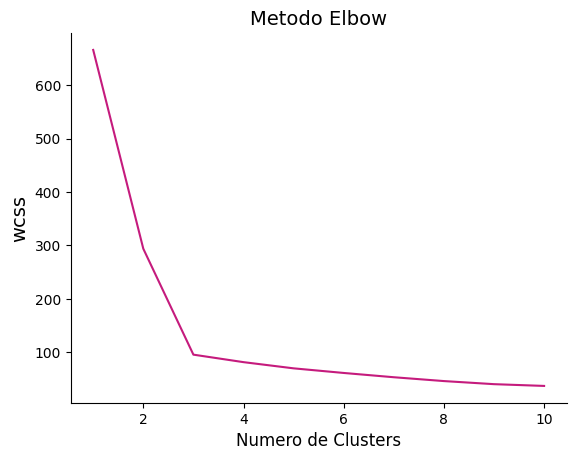

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X1)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

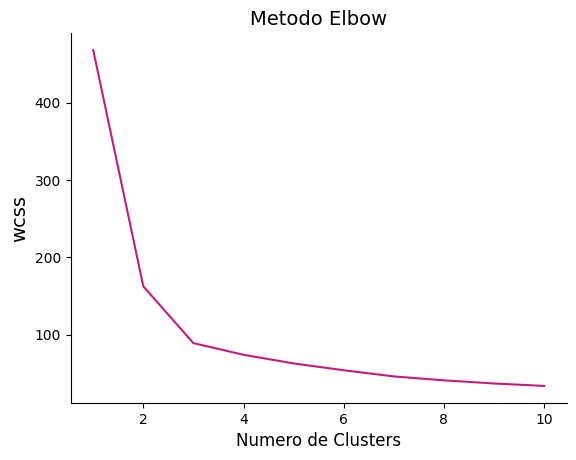

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X2)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

- **Método Silhouette**: Distancia a puntos del mismo cluster vs. puntos de distinto cluster

### K-Means

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X1)
    labels = kmeans.labels_
    sil.append(silhouette_score(X1, labels, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

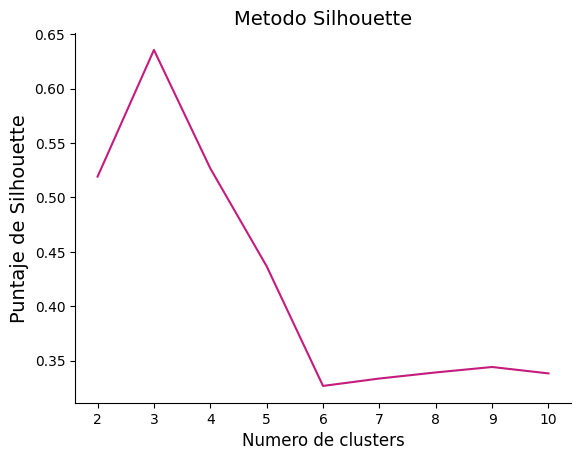

In [ ]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [ ]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X2)
    labels = kmeans.labels_
    sil.append(silhouette_score(X1, labels, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

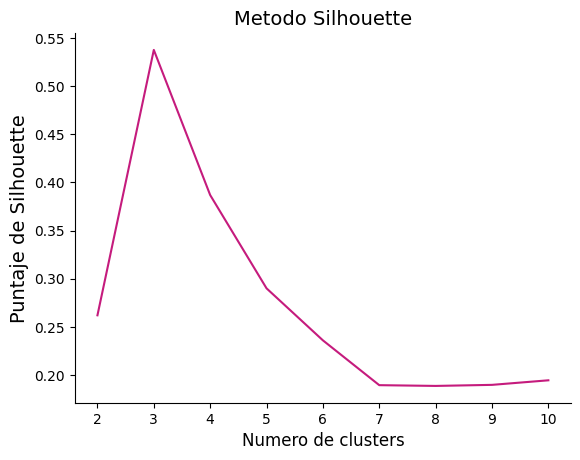

In [ ]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

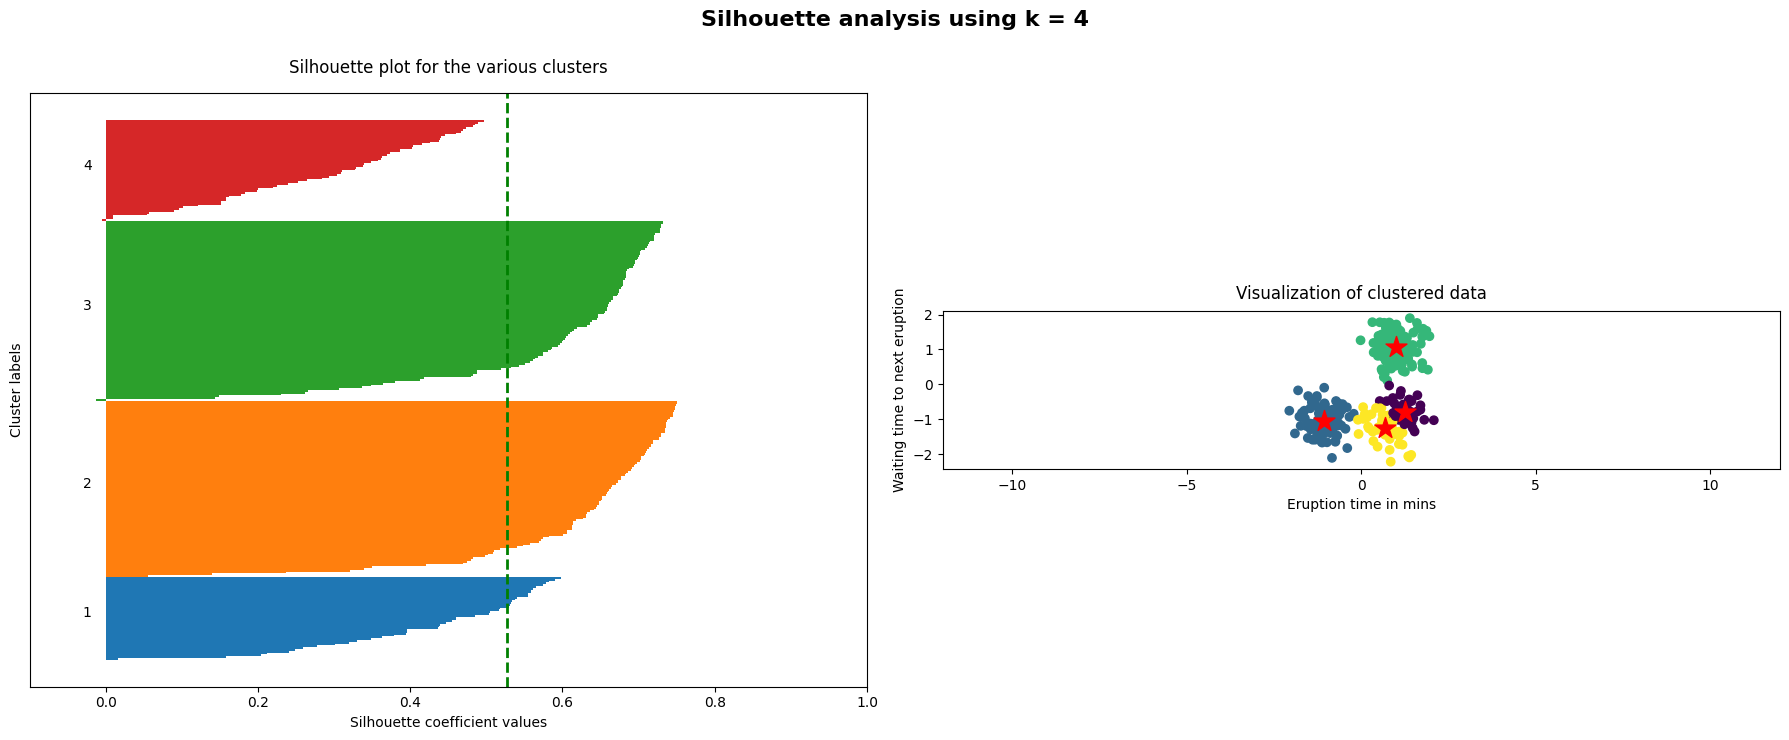

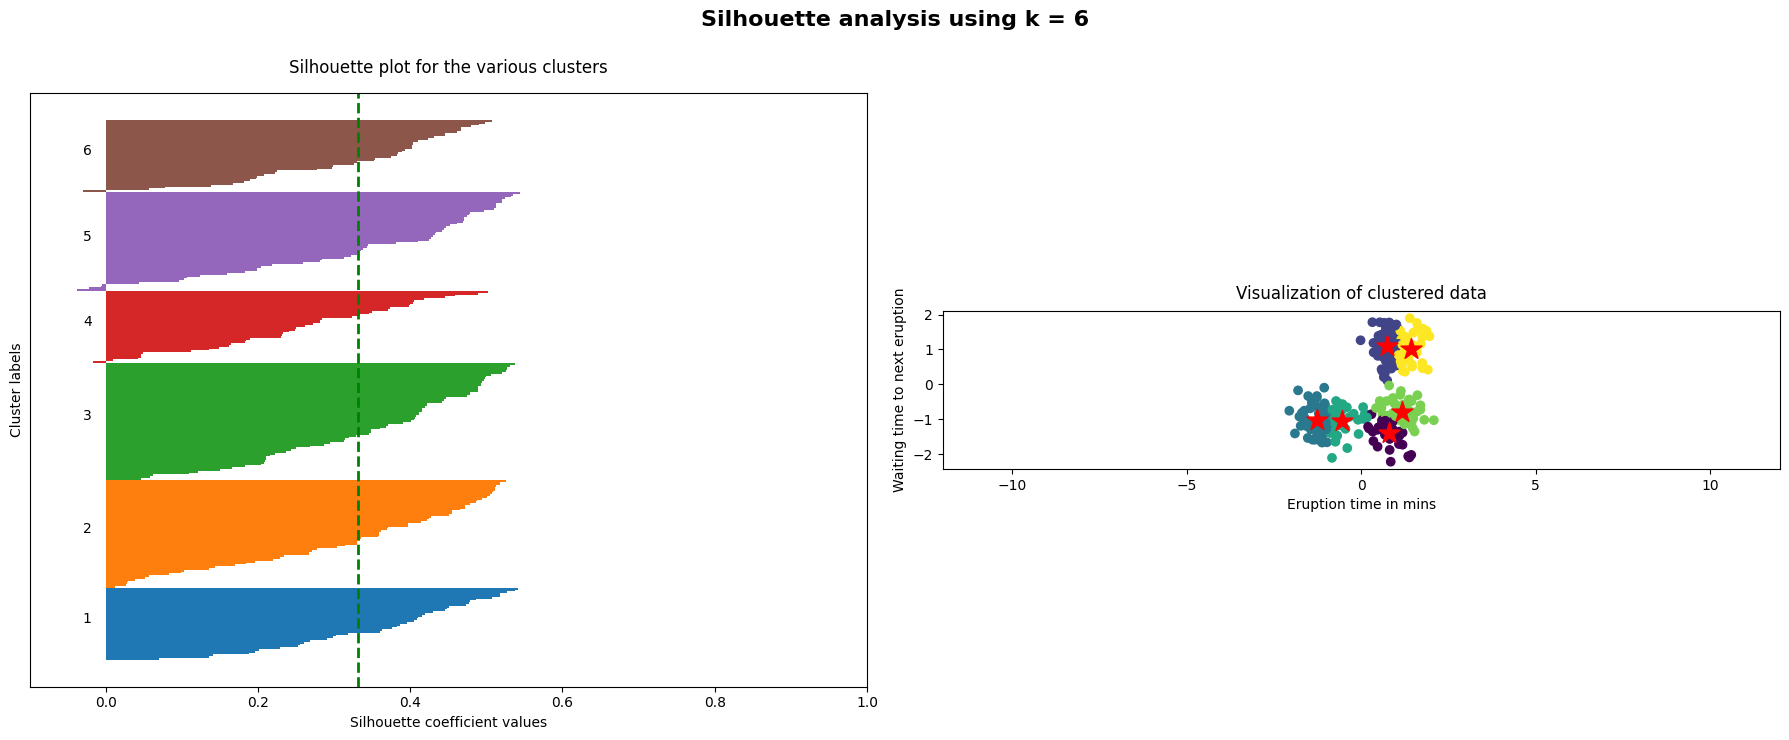

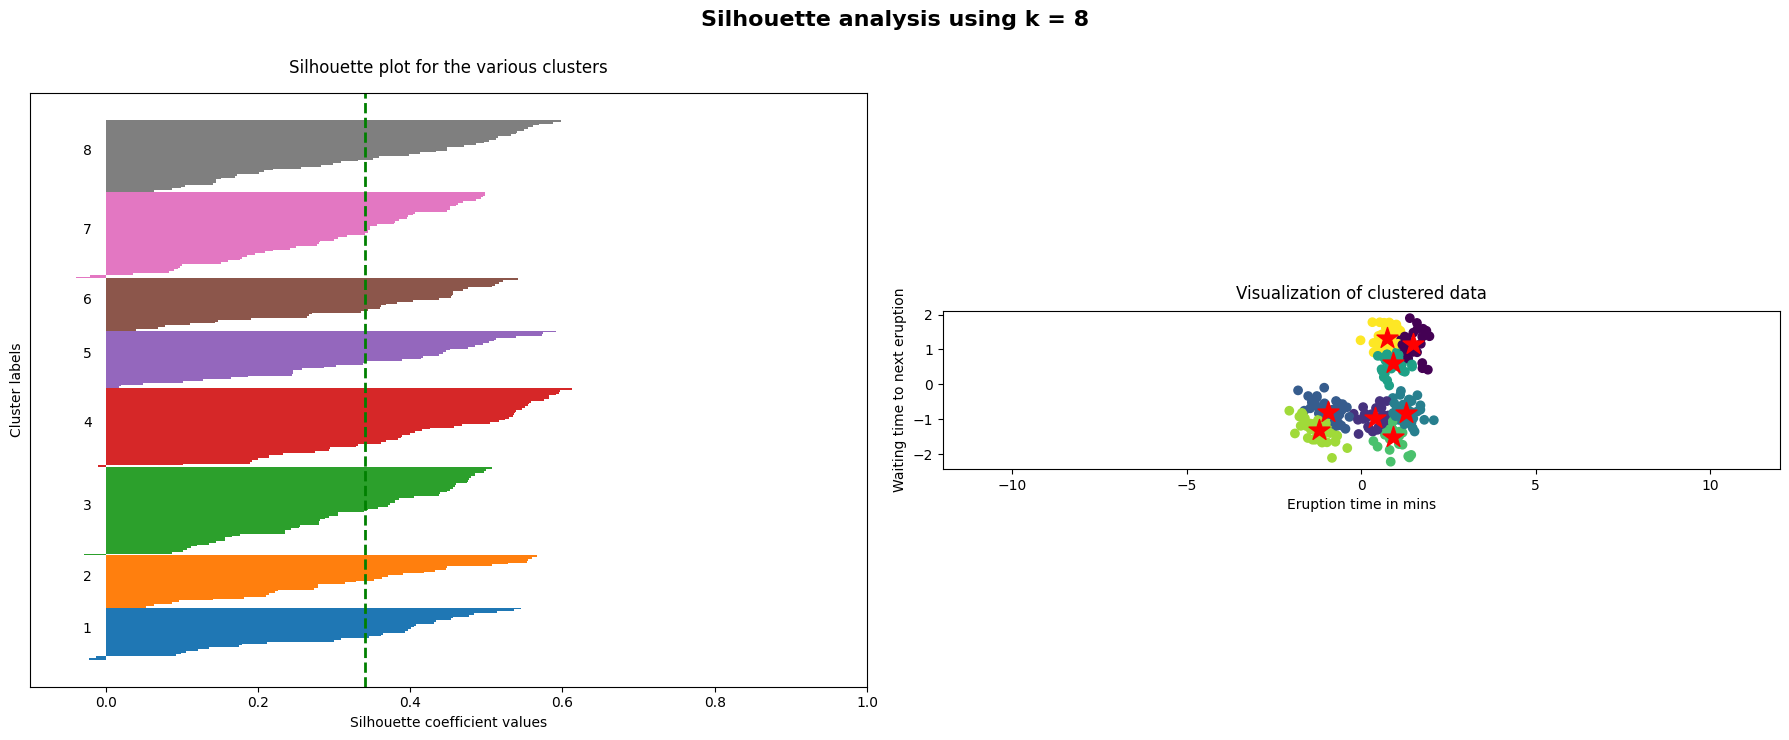

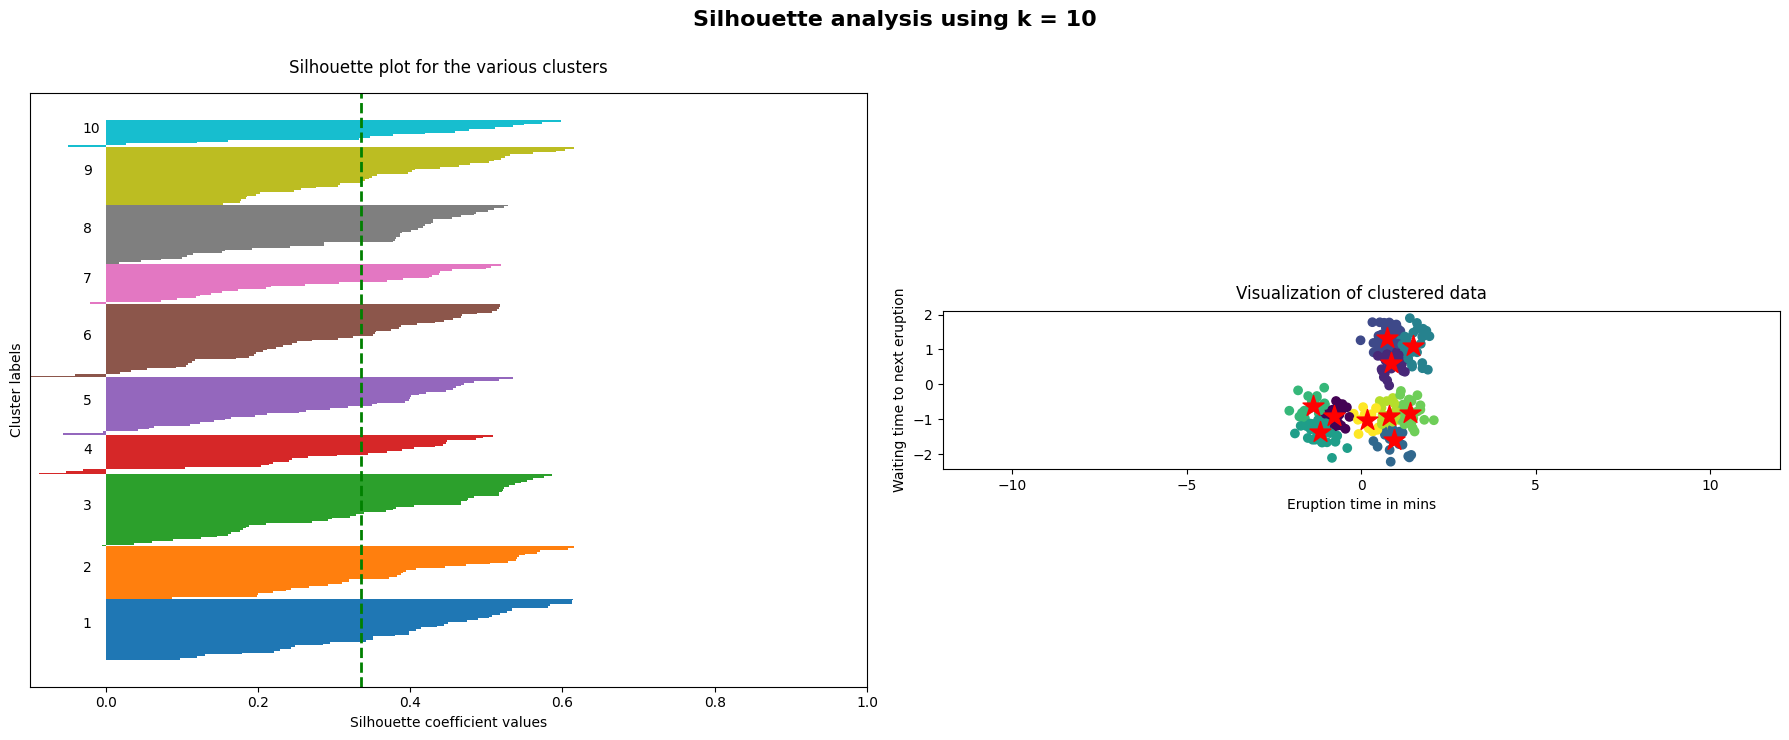

In [ ]:
from sklearn.metrics import silhouette_samples

X_std = X1
lista_k = [4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);